### Модуль 1. Выборка. Описательная статистика

##### Задача 1

По предложенной выборке найдите значения первой, третьей и седьмой порядковых статистик.

In [1]:
listec = [3.33, 6.66, 4.06, 3.54, 0.32, 5.78, 1.42, 2.35]
for i in (0,2,6):
    print(sorted(listec)[i])

0.32
2.35
5.78


##### Задача 2

По предложенной выборке постройте гистограмму, используя интервалы
[15, 15.75], (15.75, 16.5], (16.5, 17.25], (17.25, 18.0], (18.0, 18.75], (18.75, 19.5], (19.5, 20.25], 
(20.25, 21.0]
Найдите относительные частоты попадания элементов выборки в данные интервалы.

[0.025 0.    0.125 0.2   0.35  0.275 0.025 0.   ]


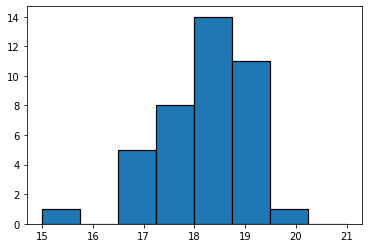

In [2]:
from matplotlib import pyplot as plt
listec = [17.45, 17.18, 18.97, 19.16, 18.83, 18.63, 17.48, 18.03, \
          18.73, 18.04, 16.59, 17.17, 18.88, 19.32, 19.13, 18.72, \
          18.19, 15.32, 17.66, 18.83, 19.45, 17.41, 18.53, 19.2, \
          16.86, 16.83, 17.96, 18.46, 17.81, 18.3, 18.03, 19.23, \
          17.99, 18.68, 18.63, 17.44, 18.38, 19.63, 19.38, 18.35]
ranges = [15, 15.75, 16.5, 17.25, 18.0, 18.75, 19.5, 20.25, 21] 
a = plt.hist(listec, bins=ranges, edgecolor='black', linewidth=1.2)
b = a[0] / len(listec)
plt.hist(b, bins=ranges)
print(b)

##### Задача 3

Какая будет средняя дневная температура июля в Санкт-Петербурге в этом году? Давайте попробуем ответить на этот вопрос на основе исторических данных.  Ниже приводится средняя дневная температура июля в Санкт-Петербурге за 2002-2015 года:

23, 24, 21, 23, 22, 21, 20, 21, 28, 25, 22, 22, 25, 21 

In [3]:
import numpy as np
listec = [23, 24, 21, 23, 22, 21, 20, 21, 28, 25, 22, 22, 25, 21]
print("Выборочное среднее:", np.mean(listec))
print("Выборочная дисперсия:", np.var(listec))
print("Выборочная медиана:", np.median(listec))
print("Первый квартиль:", np.quantile(listec, 0.25))
print("Третий квартиль:", np.quantile(listec, 0.75, interpolation = 'nearest'))

Выборочное среднее: 22.714285714285715
Выборочная дисперсия: 4.346938775510203
Выборочная медиана: 22.0
Первый квартиль: 21.0
Третий квартиль: 24


##### Задача 4

Найдите **выборочный коэффициент корреляции** между ростом и весом по данным  измерений роста и веса 10 мужчин. (Единицы измерений рост - см, вес - кг)  

(170, 66), (182, 74),  (183, 77),  (180, 72), (175, 67), (181, 77), (187, 76), (181, 77), (178, 72), (187, 76)

<img src="data/Corr_coef.png">


In [4]:
import numpy as np

height = [170, 182, 183, 180, 175, 181, 187, 181, 178, 187]
weight = [66, 74, 77, 72, 67, 77, 76, 77, 72, 76]
h_mean = np.mean(height)
w_mean = np.mean(weight)
h_var = np.var(height, ddof = 0)
w_var = np.var(weight, ddof = 0)
summ = 0
n = len(height)

# По формуле
summ = sum([x*y for x,y in zip(height,weight)])
corr = (summ/n - h_mean*w_mean) / (h_var*w_var)**0.5
print(corr, '\n')

# Numpy
print(np.corrcoef(height, weight)[0,1])

0.8588990018515538 

0.8588990018516223


### Итоговое задание

In [5]:
import pandas as pd
with open('data/13_6.txt') as file:
        a = file.readlines()
for i in range(len(a)):
    a[i] = a[i].split('\t')
df = pd.DataFrame(a)
df.columns = ['Type', 'Year, month', 'Qty6', 'Qty13', 'Shop']
df['Qty6'] = df['Qty6'].astype('int')
df['Qty13'] = df['Qty13'].astype('int')

Найдите
    выборочное среднее,
    выборочную медиану и
    выборочную дисперсию 13 числа

In [6]:
print("Выборочное среднее:", df['Qty13'].mean())
print("Выборочная медиана:", df['Qty13'].median())
print("Выборочная дисперсия:", df['Qty13'].var(ddof=0))

Выборочное среднее: 5017.0
Выборочная медиана: 4736.0
Выборочная дисперсия: 1345096.088888889


Постройте выборку из разницы числа людей, приходящих в магазин  13го и 6го числа каждого месяца

Найдите выборочное среднее, выборочный коэффициент эксцесса, выборочный коэффициент асимметрии

In [7]:
from scipy import stats as st
df['Delta'] = df['Qty13'] - df['Qty6']
print("Выборочное среднее:", df['Delta'].mean())
print("Эксцесс:", st.kurtosis(df['Delta']))
print("Ассиметрия:", st.skew(df['Delta']))

Выборочное среднее: 46.48888888888889
Эксцесс: 4.96387147481753
Ассиметрия: 1.47236056146598


Постройте гистограммы числа покупателей 13го и 6го числа, а также гистограмму разницы числа посетителей. Постройте ящики с усами числа покупателей 13го и 6го числа, а также их разницы

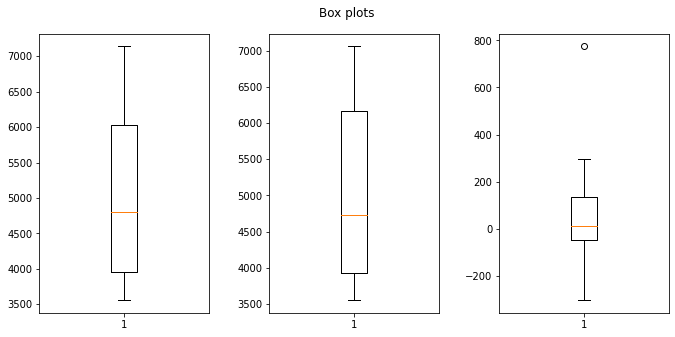

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10,5))
fig.suptitle('Box plots')
fig.tight_layout(pad=3.0)
ax1.boxplot(df['Qty6'])
ax2.boxplot(df['Qty13']);
ax3.boxplot(df['Qty13'] - df['Qty6']);

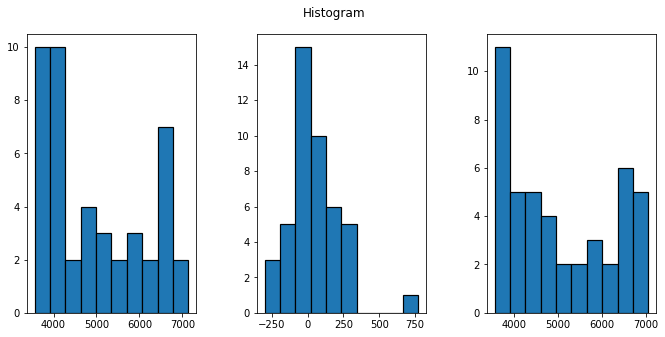

In [9]:
fig, axes = plt.subplots(1,3, figsize = (10,5))
fig.suptitle('Histogram')
fig.tight_layout(pad=3.0)
listec = [df['Qty6'], df['Qty13'] - df['Qty6'], df['Qty13']]
for ax, gr in zip(axes, listec):
    ax.hist(gr, edgecolor='black', linewidth=1.2)   

## Задача "Колледжи"
Какие отличия между исследовательскими университетами и школами искусств?
Используя данные из файла colleges, выдвините предположения о возможных различиях между двумя типами институтов.
Для это проведите описательный анализ исходных данных.  Выдвините несколько гипотез.

Например, "В университеты поступить сложнее (процент принятых меньше)"

Формат файла
    School -  название школы
    School_Type - тип школы (школа искусств  'LibArts',  исследовательский университет 'Univ')
    SAT - медиана объединенных значений Math и Verbal SAT  студентов
    Acceptance: - % принятых абитуриентов
    $/Student  -  Деньги, расходуемые на одного студента в среднем
    Top 10% -  % студентов в топ 10% выпускных классов
    %PhD -  %  факультетов, имеющих PhD
    Grad%: % студентов, которые успешно завершили обучение

In [10]:
with open('data/colleges.txt') as file:
        a = file.readlines()
for i in range(len(a)):
    a[i] = a[i].strip()
    a[i] = a[i].split('\t')
df = pd.DataFrame(a)
df.columns = df.iloc[0]
df = df.drop(0)
int_list = ['SAT', 'Acceptance', '$/Student', 'Top 10%', \
            '%PhD', 'Grad%']
df[int_list] = df[int_list].astype('int')
df.head()

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
1,Amherst,Lib Arts,1315,22,26636,85,81,93
2,Swarthmore,Lib Arts,1310,24,27487,78,93,88
3,Williams,Lib Arts,1336,28,23772,86,90,93
4,Bowdoin,Lib Arts,1300,24,25703,78,95,90
5,Wellesley,Lib Arts,1250,49,27879,76,91,86


In [11]:
LibArts = df[(df['School_Type'] == 'Lib Arts')]
Univ = df[(df['School_Type'] == 'Univ')]

Найдите

    выборочное среднее SAT школ искусств,
    3й выборочный квартиль Acceptance университетов
    название института(колледжа), в котором тратят денег в среднем на одного студента больше, чем в других институтах(колледжах)

In [12]:
import numpy as np
print('Среднее: ',LibArts['SAT'].mean())
print('3 квантиль:', np.quantile(Univ['Acceptance'], 0.75))
Univ.sort_values('$/Student', ascending = False).head(1)

Среднее:  1256.64
3 квантиль: 45.0


,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
30,Cal Tech,Univ,1400,31,102262,98,98,75


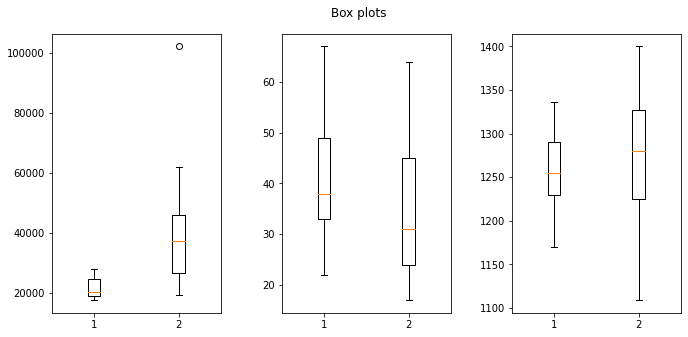

In [13]:
fig, axes = plt.subplots(1,3, figsize = (10,5))
fig.suptitle('Box plots')
fig.tight_layout(pad=3.0)
listec = [[LibArts['$/Student'], Univ['$/Student']],
          [LibArts['Acceptance'], Univ['Acceptance']],
          [LibArts['SAT'], Univ['SAT']]]
for ax, gr in zip(axes, listec):
    ax.boxplot(gr) 

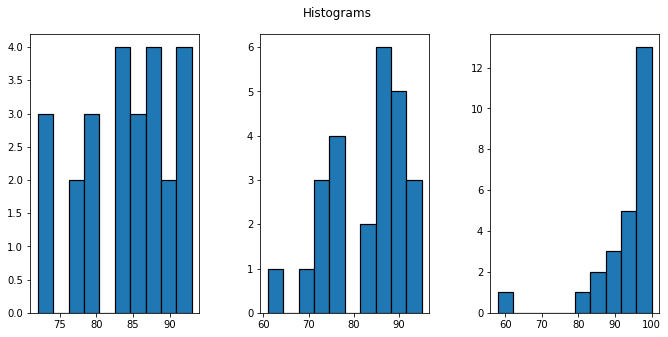

In [14]:
fig, axes = plt.subplots(1,3, figsize = (10,5))
fig.suptitle('Histograms')
fig.tight_layout(pad=3.0)
listec = [[LibArts['Grad%']],
          [Univ['Grad%']],
          [Univ['%PhD']]]
for ax, gr in zip(axes, listec):
    ax.hist(gr, edgecolor='black', linewidth=1.2) 